# Dataset and Information

Link to the dataset:
https://www.kaggle.com/CooperUnion/anime-recommendations-database/version/1

We will not be looking at movies, original video animations (OVAs), original net animations (ONAs), music, specials, and shows that are incomplete.

This analysis will only be looking at completed TV series that have a rating.

In [2]:
#standard import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
#importing dataset
anime = pd.read_csv('anime-recommendations-database/anime.csv')

In [4]:
#cleaning up dataset
anime = anime[~anime['episodes'].isin(['Unknown'])]
anime = anime[~anime['type'].isin(['Movie','OVA','ONA','Special','Music'])]
anime = anime.dropna()
anime

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888


# Basic analyses

In [5]:
#highest rated anime
anime.loc[anime['rating'].idxmax()]

anime_id                                                 5114
name                         Fullmetal Alchemist: Brotherhood
genre       Action, Adventure, Drama, Fantasy, Magic, Mili...
type                                                       TV
episodes                                                   64
rating                                                   9.26
members                                                793665
Name: 1, dtype: object

In [6]:
#anime rated equal to or above 8, worth checking out
anime.loc[anime['rating'] >= 8]

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888


In [7]:
#anime rated below 7, to see which ones are most likely not worth watching
anime.loc[anime['rating'] < 7]

,anime_id,name,genre,type,episodes,rating,members
3429,292,Dear Boys,"Drama, Shounen, Sports",TV,26,6.99,12662
3433,603,Futari wa Precure,"Action, Comedy, Fantasy, Magic, Shoujo",TV,49,6.99,17671
3435,2569,Jungle Book Shounen Mowgli,"Adventure, Drama",TV,52,6.99,3035
3436,636,Juubee-chan 2: Siberia Yagyuu no Gyakushuu,"Adventure, Comedy, Drama, Martial Arts, Samura...",TV,13,6.99,6733
3437,2772,Juushin Enbu: Hero Tales,"Action, Fantasy, Shounen",TV,26,6.99,16502
3439,5967,Kinnikuman II Sei: Ultimate Muscle,"Action, Comedy, Martial Arts, Sci-Fi, Shounen,...",TV,13,6.99,2435
3441,5891,Kousoku Denjin Albegus,Mecha,TV,45,6.99,698
3446,2707,Majime ni Fumajime Kaiketsu Zorori,"Adventure, Kids",TV,97,6.99,390
3447,1509,Mamotte! Lollipop,"Adventure, Comedy, Magic, Romance, Shoujo",TV,13,6.99,11747
3450,800,NieA Under 7,"Comedy, Sci-Fi, Slice of Life",TV,13,6.99,16711


In [8]:
#average rating of all anime that fit the aforementioned category.
anime['rating'].mean()

6.929487107623317

In [9]:
#lowest rated anime, probably should not watch but maybe those 101 members are on to something.
#it is important to note that this data is no longer an accurate representation.
#as of January 26, 2019, the anime stands at a 5.0/10 rating with 190 members.
anime.loc[anime['rating'].idxmin()]

anime_id                     33188
name        Sore Ike! Sabuibo Mask
genre        Comedy, Slice of Life
type                            TV
episodes                         8
rating                           3
members                        101
Name: 10387, dtype: object

# Using Special pandas functions

In [19]:
#genres that include tag "Action" average mean
has_action = anime.genre.str.contains('Action').astype(int)
has_action.name = 'action'
action_anime = pd.concat([has_action,anime],1)
act = action_anime.loc[action_anime.action==1].rating.mean()

In [20]:
#using groupby to look at the average rating of those tagged "Action" vs those that aren't tagged "Action"
action_anime.groupby(['action']).mean()

,anime_id,rating,members
action,,,
0,11309.410175,6.853470,34670.665342
1,9803.295627,7.111293,68467.991445


In [43]:
#genres that include tag "Adventure" average mean
has_adventure = anime.genre.str.contains('Adventure').astype(int)
has_adventure.name = 'adventure'
adventure_anime = pd.concat([has_adventure,anime],1)
adv = adventure_anime.loc[adventure_anime.adventure==1].rating.mean()

1        9.26
6        9.13
17       8.88
22       8.82
27       8.80
28       8.78
29       8.78
64       8.60
76       8.57
95       8.51
101      8.50
104      8.50
106      8.49
112      8.48
113      8.48
118      8.47
119      8.47
121      8.46
124      8.46
135      8.43
141      8.42
151      8.40
157      8.40
173      8.37
177      8.37
200      8.33
206      8.32
230      8.29
255      8.25
257      8.25
         ... 
10295    5.92
10306    7.18
10390    6.49
10395    6.71
10397    6.25
10415    6.27
10433    6.55
10495    7.00
10525    5.90
10532    5.75
10533    7.00
10570    6.67
10625    6.25
10631    6.27
10634    6.60
10637    6.22
10670    6.75
10676    5.78
10747    6.73
10751    6.32
10754    5.94
10765    8.07
10770    6.33
10772    6.33
10816    5.45
10831    8.00
10872    6.43
10873    5.23
10882    7.17
10892    6.47
Name: rating, Length: 897, dtype: float64

In [42]:
adventure_anime.groupby(['adventure']).mean()

,anime_id,rating,members
adventure,,,
0,11976.325346,6.913501,48376.040060
1,7557.166109,6.977090,33497.567447


In [23]:
#genres that include tag "Drama" average mean
has_drama = anime.genre.str.contains('Drama').astype(int)
has_drama.name = 'drama'
drama_anime = pd.concat([has_drama,anime],1)
dra = drama_anime.loc[drama_anime.drama==1].rating.mean()

In [24]:
#genres that include tag "Thriller" average mean
has_thriller = anime.genre.str.contains('Thriller').astype(int)
has_thriller.name = 'thriller'
thriller_anime = pd.concat([has_thriller,anime],1)
thr = thriller_anime.loc[thriller_anime.thriller==1].rating.mean()

In [25]:
#genres that include tag "Sports" average maen
has_sports = anime.genre.str.contains('Sports').astype(int)
has_sports.name = 'sports'
sports_anime = pd.concat([has_sports,anime],1)
spo = sports_anime.loc[sports_anime.sports==1].rating.mean()

In [50]:
has_comedy = anime.genre.str.contains('Comedy').astype(int)
has_comedy.name = 'comedy'
comedy_anime = pd.concat([has_comedy,anime],1)
com = comedy_anime.loc[comedy_anime.comedy==1].rating.mean()

# Matplotlib

Text(0, 0.5, 'Rating')

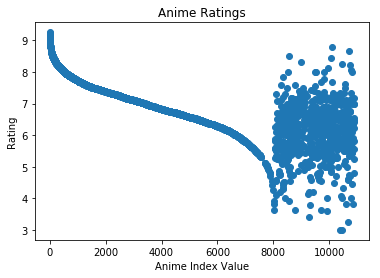

In [53]:
#several different problems with this plot, as the person who created the dataset had anime ranking go from highest to lowest
#up until around 8000 anime, and then proceeded to add with no clear pattern
plt.plot(anime.rating,'o')
plt.title('Anime Ratings')
plt.xlabel('Anime Index Value')
plt.ylabel('Rating')

In [54]:
all_adv_ratings = adventure_anime.loc[adventure_anime.adventure==1].rating
all_com_ratings = comedy_anime.loc[comedy_anime.comedy==1].rating

Text(0, 0.5, 'Rating')

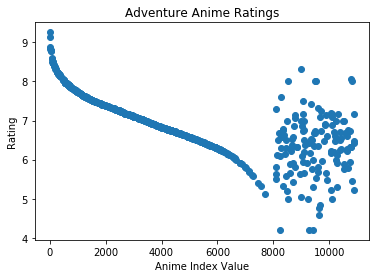

In [55]:
#like the previous graph, up until the 8000 mark, it goes from highest to lowest, and then scatters
plt.plot(all_adv_ratings,'o')
plt.title('Adventure Anime Ratings')
plt.xlabel('Anime Index Value')
plt.ylabel('Rating')
#plt.plot(data.PTS,label='Points')
#plt.plot(data.FTA,label='FTA')
#plt.legend()

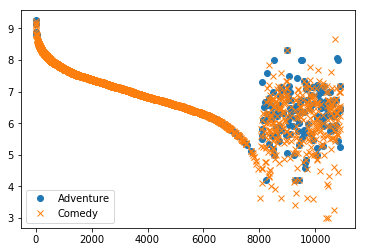

In [58]:
#comparing adventure to comedy
plt.plot(all_adv_ratings,'o',label='Adventure')
plt.plot(all_com_ratings,'x',label='Comedy')
plt.legend()

In [59]:
import seaborn as sns